# <ins>Semiconductor Wafer Defect Classification</ins>

---
## 1. Importing the data

In [1]:
# required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
# importing the data
df=pd.read_pickle("LSWMD.pkl/LSWMD.pkl")

In [3]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [5]:
total_wafers_num = df.shape[0]
total_wafers_num

811457

In [6]:
# giving a label to all the defect types to get their numbers easily
df['failure_ordinal_enc']=df.failureType
mapping_defects={'Center':0,'Donut':1,'Edge-Loc':2,'Edge-Ring':3,'Loc':4,'Random':5,'Scratch':6,'Near-full':7,'none':8}
df=df.replace({'failure_ordinal_enc': mapping_defects})

df_with_defect_num = df[(df['failure_ordinal_enc']>=0) & (df['failure_ordinal_enc']<=8)].shape[0]
df_with_pattern = df[(df['failure_ordinal_enc']>=0) & (df['failure_ordinal_enc']<=7)].reset_index()
df_with_pattern_num = df[(df['failure_ordinal_enc']>=0) & (df['failure_ordinal_enc']<=7)].shape[0]
df_with_none_num = df[(df['failure_ordinal_enc']==8)].shape[0]

print("Wafers with a defect:", df_with_defect_num)
print("Wafers with a defect(excluding none):", df_with_pattern_num)
print("Wafers with defect 'none':", df_with_none_num)

Wafers with a defect: 172950
Wafers with a defect(excluding none): 25519
Wafers with defect 'none': 147431


## 2. Data analysis

**2.1 Distribution of data** 

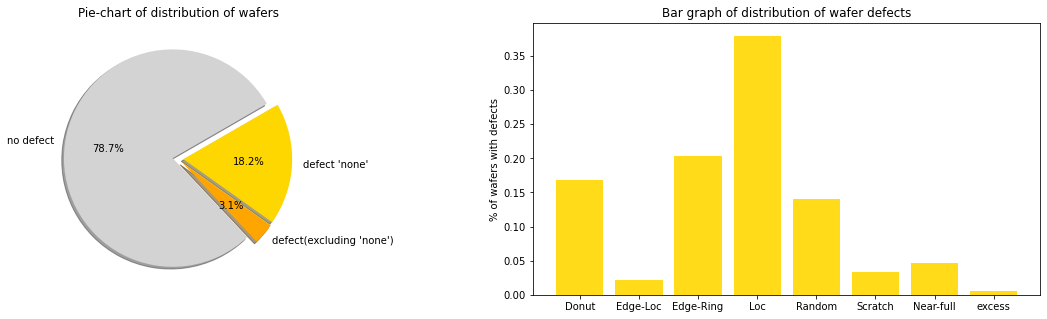

In [7]:
# ax1 is the pie chart, ax2 is the bar graph
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 5))

# pie chart
# distribution = [number of wafers with no defect, 
#                 number of wafers with a defect (excluding 'none'), 
#                 number of wafers with defect 'none']
distribution=[total_wafers_num - df_with_defect_num, 
              df_with_pattern_num, 
              df_with_none_num]

ax1.pie(distribution,  
        explode=(0.05, 0.05, 0.05),
        labels=['no defect','defect(excluding \'none\')','defect \'none\''],
        colors=['lightgray', 'orange', 'gold'], 
        autopct='%1.1f%%', shadow=True, startangle=30)
ax1.set_title("Pie-chart of distribution of wafers")

# bar graph
# unique_pattern = (array([0, 1, 2, 3, 4, 5, 6, 7], dtype=object),
#                   array([4294,  555, 5189, 9680, 3593,  866, 1193,  149], dtype=int64))
# basically it contains each defect's frequency
unique_pattern=np.unique(df_with_pattern.failure_ordinal_enc, return_counts=True)

labels = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full','excess']
ax2.bar(unique_pattern[0],unique_pattern[1]/df_with_pattern_num, color='gold', align='center', alpha=0.9)
ax2.set_title("Frequency of defects")
ax2.set_ylabel("% of wafers with defects")
ax2.set_xticklabels(labels)
ax2.set_title("Bar graph of distribution of wafer defects")

plt.show()

**2.2 Visualisation of defects** 

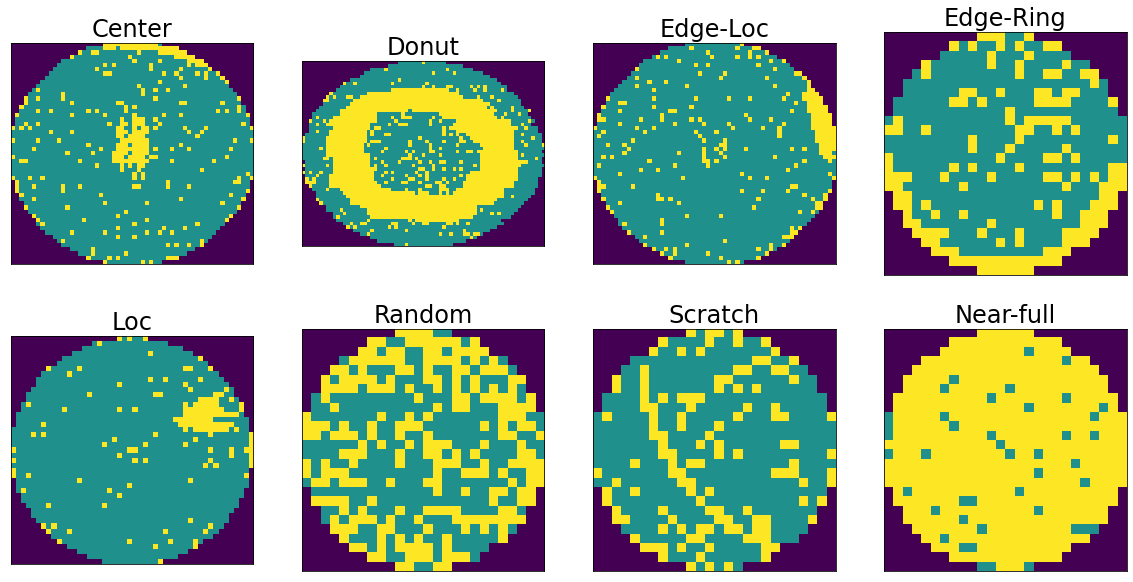

In [8]:
x = [9,340, 3, 16, 0, 25, 84, 37]
# {'Center': 9, 'Donut': 340, 'Edge-Loc': 3, 'Edge-Ring': 16, 'Loc': 0, 'Random': 25,  'Scratch': 84, 'Near-full': 37}

fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize=(20, 10))
ax = ax.ravel(order='C')

for i in range(8):
    ax[i].imshow(df_with_pattern.waferMap[x[i]])
    ax[i].set_title(df_with_pattern.failureType[x[i]][0][0],fontsize=24)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show() 

## 3. Data preprocessing

**3.1 Checking the image dimensions**

In [9]:
# creating a new column 
def find_dim(x):
    dim_x=np.size(x,axis=0)
    dim_y=np.size(x,axis=1)
    return dim_x,dim_y
df['waferMapDim']=df.waferMap.apply(find_dim)
df.sample(5)

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,failure_ordinal_enc,waferMapDim
85099,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,...",939.0,lot6095,8.0,[],[],[],"(39, 31)"
167690,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",572.0,lot10682,10.0,[],[],[],"(22, 35)"
505340,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",710.0,lot31396,23.0,[],[],[],"(32, 29)"
309965,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...",1139.0,lot18864,1.0,[],[],[],"(38, 38)"
223583,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...",1109.0,lot14074,22.0,[],[],[],"(39, 37)"


**3.2 Making new datasets for defective data, and splitting into test-train**

In [10]:
# making new datasets of those with defects, and those with defects(exclusing 'none')
df_with_defect = df[(df['failure_ordinal_enc']>=0) & (df['failure_ordinal_enc']<=8)]
df_with_pattern = df[(df['failure_ordinal_enc']>=0) & (df['failure_ordinal_enc']<=7)].reset_index()

# splitting into testing and training data based on dataset label (unproc=unprocessed)
x_train_unproc=df_with_pattern[(df_with_pattern['trianTestLabel']=='Training')].waferMap.reset_index()
y_train_unproc=df_with_pattern[(df_with_pattern['trianTestLabel']=='Training')].failureType.reset_index()

x_test_unproc=df_with_pattern[(df_with_pattern['trianTestLabel']=='Test')].waferMap.reset_index()
y_test_unproc=df_with_pattern[(df_with_pattern['trianTestLabel']=='Test')].failureType.reset_index()

In [11]:
max(df_with_defect.waferMapDim)

(212, 84)

**3.3 Modifying training and testing data to fit classifiers**

In [12]:
# making wafer map dimensions (size) equal to fit in the classifier
x_train=[]
for i in range(x_train_unproc.shape[0]):
    img=x_train_unproc['waferMap'][i].copy()
    img.resize(220,90)
    img_new=img.reshape(-1)
    x_train.append(img_new)
    
# changing y values from nested list to string type
y_train=[type[0][0] for type in y_train_unproc['failureType']]

x_test=[]
for i in range(x_test_unproc.shape[0]):
    img=x_test_unproc['waferMap'][i].copy()
    img.resize(220,90)
    img_new=img.reshape(-1)
    x_test.append(img_new)
    
# changing y values from nested list to string type
y_test=[type[0][0] for type in y_test_unproc['failureType']]

## 4. Models

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

**4.1 Logistic Regression**

In [14]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [15]:
log_reg.classes_

array(['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-full',
       'Random', 'Scratch'], dtype='<U9')

In [16]:
y_pred_train=log_reg.predict(x_train)

print(classification_report(y_train, y_pred_train))
cm=confusion_matrix(y_train, y_pred_train)
print('Diagonal elements of confusion matrix: ')
for i in range(0,cm.shape[0]):
    print(cm[i][i], end =", "),
cm

              precision    recall  f1-score   support

      Center       0.95      0.95      0.95      3462
       Donut       0.94      0.92      0.93       409
    Edge-Loc       0.81      0.89      0.85      2417
   Edge-Ring       0.99      0.99      0.99      8554
         Loc       0.82      0.78      0.80      1620
   Near-full       0.60      0.22      0.32        54
      Random       0.92      0.84      0.88       609
     Scratch       0.85      0.74      0.79       500

    accuracy                           0.93     17625
   macro avg       0.86      0.79      0.81     17625
weighted avg       0.93      0.93      0.93     17625

Diagonal elements of confusion matrix: 
3291, 376, 2149, 8447, 1261, 12, 514, 371, 

array([[3291,    7,   81,    7,   60,    0,    5,   11],
       [   6,  376,   12,    2,   13,    0,    0,    0],
       [  59,    3, 2149,   57,  116,    5,   12,   16],
       [   6,    0,   83, 8447,    6,    0,    6,    6],
       [  73,   15,  215,   12, 1261,    2,   15,   27],
       [   2,    0,   23,    0,   11,   12,    6,    0],
       [  15,    1,   43,    3,   29,    1,  514,    3],
       [  14,    0,   63,    7,   42,    0,    3,  371]], dtype=int64)

In [17]:
y_pred_test=log_reg.predict(x_test)

print(classification_report(y_test, y_pred_test))
cm=confusion_matrix(y_test, y_pred_test)
print('Diagonal elements of confusion matrix: ')
for i in range(0,cm.shape[0]):
    print(cm[i][i], end =", "),
cm

              precision    recall  f1-score   support

      Center       0.20      0.38      0.27       832
       Donut       0.20      0.03      0.05       146
    Edge-Loc       0.39      0.38      0.39      2772
   Edge-Ring       0.47      0.30      0.37      1126
         Loc       0.31      0.30      0.30      1973
   Near-full       0.12      0.01      0.02        95
      Random       0.04      0.12      0.06       257
     Scratch       0.11      0.03      0.05       693

    accuracy                           0.30      7894
   macro avg       0.23      0.19      0.19      7894
weighted avg       0.32      0.30      0.30      7894

Diagonal elements of confusion matrix: 
317, 4, 1050, 340, 588, 1, 30, 23, 

array([[ 317,    1,  244,   43,  159,    0,   41,   27],
       [  22,    4,   15,    0,   97,    0,    1,    7],
       [ 604,    3, 1050,  191,  689,    4,  202,   29],
       [ 102,    0,  248,  340,   77,    0,  343,   16],
       [ 323,    7,  757,   88,  588,    1,  127,   82],
       [  13,    1,   39,    2,   17,    1,   10,   12],
       [  57,    2,   75,    4,   81,    0,   30,    8],
       [ 120,    2,  251,   49,  189,    2,   57,   23]], dtype=int64)

**4.2 K-Nearest Neighbours**

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)

KNeighborsClassifier()

In [19]:
knn_clf.classes_

array(['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-full',
       'Random', 'Scratch'], dtype='<U9')

In [20]:
y_pred_train=knn_clf.predict(x_train)

print(classification_report(y_train, y_pred_train))
cm=confusion_matrix(y_train, y_pred_train)
print('Diagonal elements of confusion matrix: ')
for i in range(0,cm.shape[0]):
    print(cm[i][i], end =", "),
cm

              precision    recall  f1-score   support

      Center       0.90      0.89      0.89      3462
       Donut       0.95      0.85      0.90       409
    Edge-Loc       0.83      0.72      0.77      2417
   Edge-Ring       0.98      0.99      0.98      8554
         Loc       0.54      0.79      0.64      1620
   Near-full       0.67      0.83      0.74        54
      Random       0.99      0.68      0.80       609
     Scratch       0.68      0.45      0.54       500

    accuracy                           0.88     17625
   macro avg       0.82      0.77      0.78     17625
weighted avg       0.90      0.88      0.88     17625

Diagonal elements of confusion matrix: 
3067, 348, 1731, 8446, 1277, 45, 412, 225, 

array([[3067,    3,   24,    2,  345,    0,    1,   20],
       [  17,  348,   11,    6,   24,    0,    0,    3],
       [  90,    1, 1731,   74,  488,    4,    0,   29],
       [  14,    0,   42, 8446,   48,    0,    0,    4],
       [ 105,   11,  158,   20, 1277,    1,    1,   47],
       [   3,    0,    4,    0,    0,   45,    2,    0],
       [  56,    3,   64,   27,   27,   17,  412,    3],
       [  52,    0,   45,   22,  156,    0,    0,  225]], dtype=int64)

In [21]:
y_pred_test=knn_clf.predict(x_test)

print(classification_report(y_test, y_pred_test))
cm=confusion_matrix(y_test, y_pred_test)
print('Diagonal elements of confusion matrix: ')
for i in range(0,cm.shape[0]):
    print(cm[i][i], end =", "),
cm

              precision    recall  f1-score   support

      Center       0.16      0.38      0.23       832
       Donut       0.40      0.01      0.03       146
    Edge-Loc       0.45      0.41      0.43      2772
   Edge-Ring       0.56      0.44      0.49      1126
         Loc       0.29      0.32      0.31      1973
   Near-full       0.57      0.28      0.38        95
      Random       0.19      0.04      0.06       257
     Scratch       0.17      0.06      0.09       693

    accuracy                           0.34      7894
   macro avg       0.35      0.24      0.25      7894
weighted avg       0.36      0.34      0.34      7894

Diagonal elements of confusion matrix: 
317, 2, 1129, 490, 636, 27, 10, 42, 

array([[ 317,    0,  136,    6,  345,    0,    1,   27],
       [  28,    2,   10,    1,  103,    1,    1,    0],
       [ 685,    0, 1129,  203,  701,    4,    2,   48],
       [ 252,    0,  226,  490,  146,    0,    0,   12],
       [ 448,    1,  688,   81,  636,    0,    6,  113],
       [   6,    0,   23,    6,    1,   27,   32,    0],
       [  94,    1,   64,   25,   46,   15,   10,    2],
       [ 152,    1,  222,   62,  214,    0,    0,   42]], dtype=int64)

**4.3 Random Forest Classifier**

In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc_clf = RandomForestClassifier(random_state=42)
rfc_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
rfc_clf.classes_

array(['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-full',
       'Random', 'Scratch'], dtype='<U9')

In [24]:
y_pred_train=rfc_clf.predict(x_train)

print(classification_report(y_train, y_pred_train))
cm=confusion_matrix(y_train, y_pred_train)
print('Diagonal elements of confusion matrix: ')
for i in range(0,cm.shape[0]):
    print(cm[i][i], end =", "),
cm

              precision    recall  f1-score   support

      Center       1.00      1.00      1.00      3462
       Donut       1.00      1.00      1.00       409
    Edge-Loc       1.00      1.00      1.00      2417
   Edge-Ring       1.00      1.00      1.00      8554
         Loc       1.00      1.00      1.00      1620
   Near-full       1.00      1.00      1.00        54
      Random       1.00      1.00      1.00       609
     Scratch       1.00      1.00      1.00       500

    accuracy                           1.00     17625
   macro avg       1.00      1.00      1.00     17625
weighted avg       1.00      1.00      1.00     17625

Diagonal elements of confusion matrix: 
3462, 409, 2417, 8554, 1620, 54, 609, 500, 

array([[3462,    0,    0,    0,    0,    0,    0,    0],
       [   0,  409,    0,    0,    0,    0,    0,    0],
       [   0,    0, 2417,    0,    0,    0,    0,    0],
       [   0,    0,    0, 8554,    0,    0,    0,    0],
       [   0,    0,    0,    0, 1620,    0,    0,    0],
       [   0,    0,    0,    0,    0,   54,    0,    0],
       [   0,    0,    0,    0,    0,    0,  609,    0],
       [   0,    0,    0,    0,    0,    0,    0,  500]], dtype=int64)

In [25]:
y_pred_test=rfc_clf.predict(x_test)

print(classification_report(y_test, y_pred_test))
cm=confusion_matrix(y_test, y_pred_test)
print('Diagonal elements of confusion matrix: ')
for i in range(0,cm.shape[0]):
    print(cm[i][i], end =", "),
cm

              precision    recall  f1-score   support

      Center       0.31      0.21      0.25       832
       Donut       0.40      0.01      0.03       146
    Edge-Loc       0.41      0.56      0.47      2772
   Edge-Ring       0.50      0.38      0.43      1126
         Loc       0.27      0.34      0.30      1973
   Near-full       0.96      0.23      0.37        95
      Random       0.28      0.18      0.22       257
     Scratch       0.20      0.03      0.06       693

    accuracy                           0.37      7894
   macro avg       0.42      0.24      0.27      7894
weighted avg       0.36      0.37      0.35      7894

Diagonal elements of confusion matrix: 
171, 2, 1545, 426, 665, 22, 46, 23, 

array([[ 171,    0,  327,   56,  272,    0,    4,    2],
       [   8,    2,   24,    1,  108,    0,    3,    0],
       [ 138,    0, 1545,  180,  860,    0,   15,   34],
       [  35,    0,  384,  426,  210,    0,   25,   46],
       [ 119,    3, 1049,  115,  665,    0,   14,    8],
       [   2,    0,   14,    0,    1,   22,   56,    0],
       [  40,    0,  118,   19,   33,    1,   46,    0],
       [  36,    0,  309,   52,  272,    0,    1,   23]], dtype=int64)

## 5. [['none']] type classification attempt

In [26]:
df_with_defect_none = df_with_defect[(df_with_defect['failure_ordinal_enc']==8)]
df_with_defect_none.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,failure_ordinal_enc,waferMapDim
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]],8,"(45, 48)"
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]],8,"(45, 48)"
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]],8,"(45, 48)"
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]],8,"(45, 48)"
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]],8,"(45, 48)"


In [27]:
x_none_unproc=df_with_defect_none.waferMap.reset_index()

# making wafer map dimensions (size) equal to fit in the classifier
x_none=[]
for i in range(x_none_unproc.shape[0]):
    img=x_none_unproc['waferMap'][i].copy()
    img.resize(220,90)
    img_new=img.reshape(-1)
    x_none.append(img_new)

In [28]:
y_none_pred=knn_clf.predict(x_none)

In [31]:
df_with_defect_none['alternateDefect']=y_none_pred
df_with_defect_none

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,failure_ordinal_enc,waferMapDim,alternateDefect
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]],8,"(45, 48)",Center
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]],8,"(45, 48)",Center
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]],8,"(45, 48)",Center
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]],8,"(45, 48)",Center
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]],8,"(45, 48)",Center
...,...,...,...,...,...,...,...,...,...
811438,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,9.0,[[Test]],[[none]],8,"(26, 30)",Edge-Loc
811439,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,10.0,[[Test]],[[none]],8,"(26, 30)",Edge-Loc
811442,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1,...",600.0,lot47542,13.0,[[Test]],[[none]],8,"(26, 30)",Edge-Loc
811445,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,16.0,[[Test]],[[none]],8,"(26, 30)",Edge-Loc


In [30]:
import collections

counter=collections.Counter(y_none_pred)
print(counter)

Counter({'Loc': 47007, 'Edge-Loc': 45210, 'Center': 33517, 'Edge-Ring': 11782, 'Scratch': 9914, 'Random': 1})
